<a href="https://colab.research.google.com/github/Gabriellemga/Machine_learning/blob/main/Classifica%C3%A7%C3%A3o_valida%C3%A7%C3%A3o_modelos_metricas_avalia%C3%A7%C3%A3o/Desafio_valida%C3%A7%C3%A3o_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   glicemia              394 non-null    int64  
 1   pressao_sanguinea     394 non-null    int64  
 2   dobra_cutane_triceps  394 non-null    int64  
 3   insulina              394 non-null    float64
 4   imc                   394 non-null    float64
 5   diabetes              394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [21]:
x = df.drop('diabetes', axis = 1)
y = df['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x, x_test, y, y_test = train_test_split(x, y, test_size = 0.05, stratify = y, random_state=452)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25, stratify = y, random_state=452)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
modelo_arvore = DecisionTreeClassifier(max_depth = 5)
modelo_arvore.fit(x_train, y_train)

print(f'Acurácia de treino: {modelo_arvore.score(x_train, y_train)}')
print(f'Acurácia de teste: {modelo_arvore.score(x_val, y_val)}')

Acurácia de treino: 0.8535714285714285
Acurácia de teste: 0.5957446808510638


In [26]:
modelo_floresta = RandomForestClassifier(max_depth = 5)
modelo_floresta.fit(x_train, y_train)
print(f'Acurácia de treino: {modelo_floresta.score(x_train, y_train)}')
print(f'Acurácia de teste: {modelo_floresta.score(x_val, y_val)}')

Acurácia de treino: 0.8857142857142857
Acurácia de teste: 0.6808510638297872


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

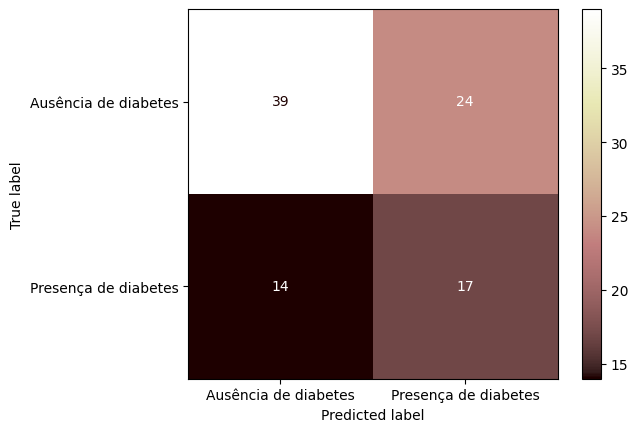

In [28]:
y_previsto_arvore = modelo_arvore.predict(x_val)
matriz_arvore = confusion_matrix(y_val, y_previsto_arvore)
ConfusionMatrixDisplay(matriz_arvore, display_labels = ['Ausência de diabetes', 'Presença de diabetes']).plot(cmap='pink');

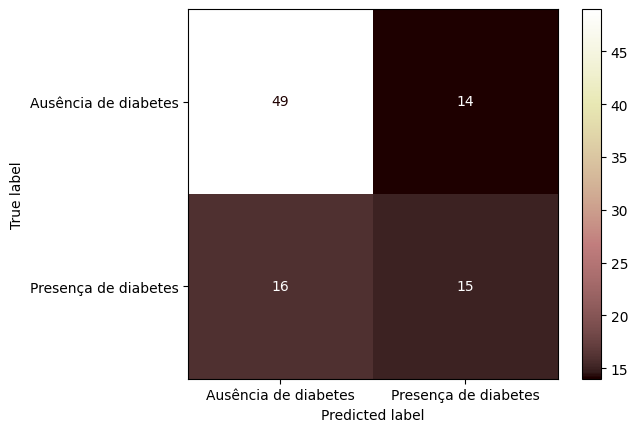

In [29]:
y_previsto_floresta = modelo_floresta.predict(x_val)
matriz_floresta = confusion_matrix(y_val, y_previsto_floresta)
ConfusionMatrixDisplay(matriz_floresta, display_labels = ['Ausência de diabetes', 'Presença de diabetes']).plot(cmap='pink');

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [31]:
# Modelo DecisionTree
print(f'Acurácia:{accuracy_score(y_val,y_previsto_arvore)}')
print(f'Recall:{recall_score(y_val,y_previsto_arvore)}')
print(f'Precisão:{precision_score(y_val,y_previsto_arvore)}')
print(f'F1-Score:{f1_score(y_val,y_previsto_arvore)}')

Acurácia:0.5957446808510638
Recall:0.5483870967741935
Precisão:0.4146341463414634
F1-Score:0.4722222222222222


In [32]:
# Modelo RandomForest
print(f'Acurácia:{accuracy_score(y_val,y_previsto_floresta)}')
print(f'Recall:{recall_score(y_val,y_previsto_floresta)}')
print(f'Precisão:{precision_score(y_val,y_previsto_floresta)}')
print(f'F1-Score:{f1_score(y_val,y_previsto_floresta)}')

Acurácia:0.6808510638297872
Recall:0.4838709677419355
Precisão:0.5172413793103449
F1-Score:0.5


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [33]:
from sklearn.metrics import RocCurveDisplay

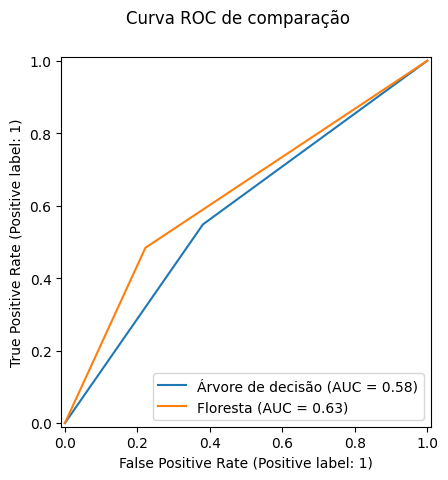

In [39]:
arvore_roc = RocCurveDisplay.from_predictions(y_val, y_previsto_arvore, name = 'Árvore de decisão')
floresta_roc = RocCurveDisplay.from_predictions(y_val, y_previsto_floresta, name = 'Floresta', ax = arvore_roc.ax_)
floresta_roc.figure_.suptitle('Curva ROC de comparação');

In [40]:
from sklearn.metrics import roc_auc_score

In [42]:
print(f'ROC AUC arvore: {roc_auc_score(y_val, y_previsto_arvore)}')
print(f'ROC AUC floresta: {roc_auc_score(y_val, y_previsto_floresta)}')

ROC AUC arvore: 0.5837173579109063
ROC AUC floresta: 0.6308243727598566


### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [43]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

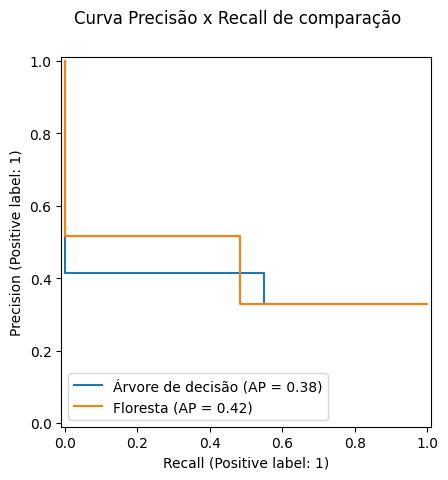

In [44]:
arvore_roc = PrecisionRecallDisplay.from_predictions(y_val, y_previsto_arvore, name = 'Árvore de decisão')
floresta_roc = PrecisionRecallDisplay.from_predictions(y_val, y_previsto_floresta, name = 'Floresta', ax = arvore_roc.ax_)
floresta_roc.figure_.suptitle('Curva Precisão x Recall de comparação');

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [45]:
from sklearn.metrics import classification_report

In [49]:
print('--Relatório de metricas TreeDecision')
print(f'{classification_report(y_val, y_previsto_arvore)}\n\n')
print('--Relatório de metricas RandomForest')
print(f'{classification_report(y_val, y_previsto_floresta)}')

--Relatório de metricas TreeDecision
              precision    recall  f1-score   support

           0       0.74      0.62      0.67        63
           1       0.41      0.55      0.47        31

    accuracy                           0.60        94
   macro avg       0.58      0.58      0.57        94
weighted avg       0.63      0.60      0.61        94



--Relatório de metricas RandomForest
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        63
           1       0.52      0.48      0.50        31

    accuracy                           0.68        94
   macro avg       0.64      0.63      0.63        94
weighted avg       0.68      0.68      0.68        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [50]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [51]:
from sklearn.model_selection import cross_val_score, KFold

In [52]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5512379197001618, 0.8075103022059551]
Intervalo de confiança (Random Forest): [0.5296803290480517, 0.8454263565849497]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [53]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [54]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.3552940701000894, 0.7841897713125375]
Intervalo de confiança (Random Forest): [-0.022511920266763852, 0.7845353113923222]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [55]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [56]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}')

Acurácia média (Decision Tree): 0.7112299465240641
Acurácia média (Random Forest):0.6925133689839572


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [58]:
df['diabetes'].value_counts(normalize = True)

,proportion
diabetes,
0,0.670051
1,0.329949


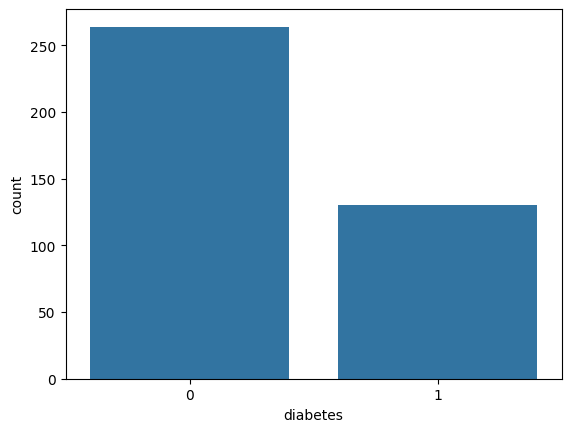

In [59]:
import seaborn as sns

sns.countplot(df, x = 'diabetes');

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [60]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [61]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.6053255621998016


In [62]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6140738284703802


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [63]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [64]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.5109513884808002


In [65]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6303602848764139


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.50      0.57      0.53         7

    accuracy                           0.65        20
   macro avg       0.62      0.63      0.63        20
weighted avg       0.66      0.65      0.65        20



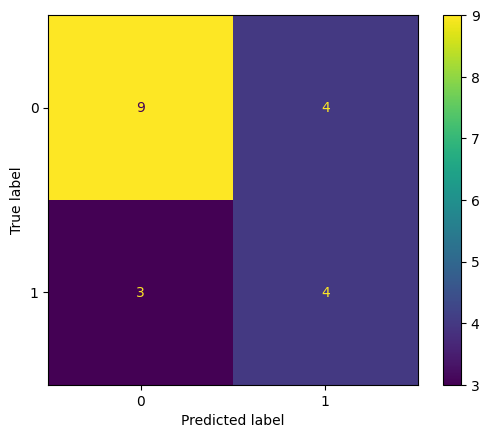

In [67]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);